In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
6,2732,4,135.0
9,3700,5,167.0
12,1000,2,38.0
2,1440,3,62.0


In [50]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [51]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [29]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [52]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [53]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

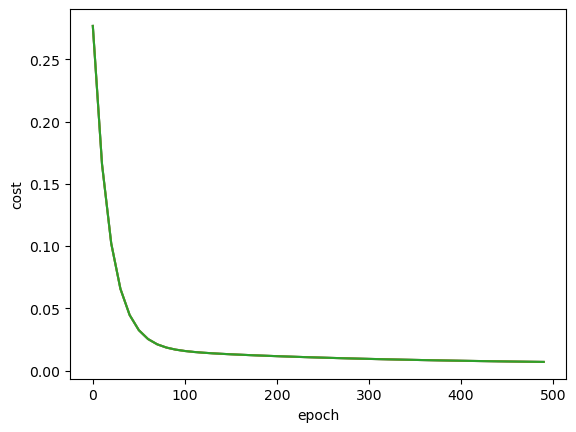

In [56]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)
plt.show()

In [88]:
def predict(area,bedroom,w,b):
    #First we need to tranform the original data as per the minmax scaler we have code:-
    scaled_x=sx.transform([[area,bedroom]])[0]
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1]+b
    #Our predicted price would be Scaler form we need to reverse tranform it to original form
    # return sy.inverse_transform([[scaled_price]])
    #Above one gives output as 2 dimensional array we need something 1 dimension so
    return sy.inverse_transform([[scaled_price]])[0][0]
    # return scaled_price

In [89]:
predict(2600,4,w,b)

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

<h3> Done with Batch Gradient Descent now let's start with Stochastic Gradient Descent</h3>

In [107]:
import random
        
def stochasticgradientdescent(x,y,epochs,learningrate=0.01):
    nof=x.shape[1]
    w=np.ones(shape=(nof))
    b=0
    totalsamples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        index=random.randint(0,totalsamples-1)
        sample_x=x[index]
        sampley=y[index]
        ypred=np.dot(w,sample_x.T)+b
        w_grad = -(2/totalsamples)*(sample_x.T.dot(sampley-ypred))
        b_grad = -(2/totalsamples)*np.sum(sampley-ypred)
        
        w = w - learningrate * w_grad
        b = b - learningrate * b_grad
        
        cost = np.mean(np.square(sampley-ypred)) # MSE (Mean Squared Error)
        
        if i%50==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [108]:
w_sgd,b_sgd,cost,costlist,epochlist=stochasticgradientdescent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_sgd,b_sgd,cost

(array([0.86719625, 0.84233935]),
 np.float64(-0.24914341204111218),
 np.float64(0.06219677110893416))

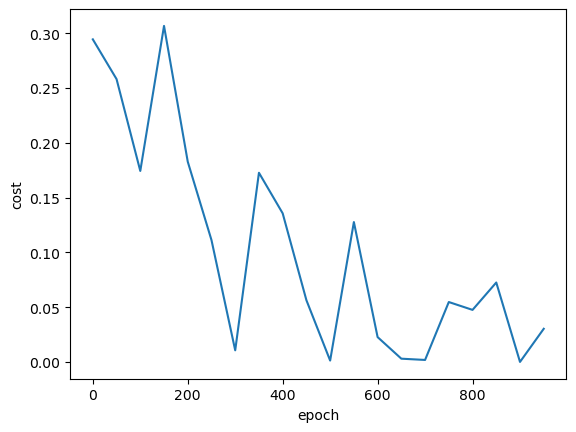

In [109]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epochlist,costlist)
plt.show()

In [110]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(156.31756325288936)

<h4>We can see that things didn't work quite well now let's try to expand no. of epochs for more accuracy</h4>

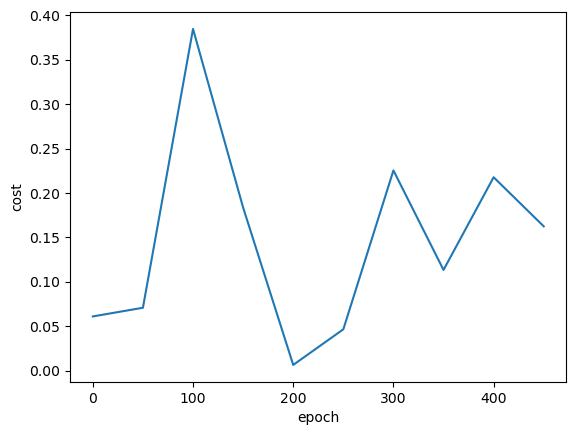

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(177.34688261635722)

In [113]:
w_sgd,b_sgd,cost,costlist,epochlist=stochasticgradientdescent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w_sgd,b_sgd,cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epochlist,costlist)
plt.show()
predict(2600,4,w_sgd,b_sgd)

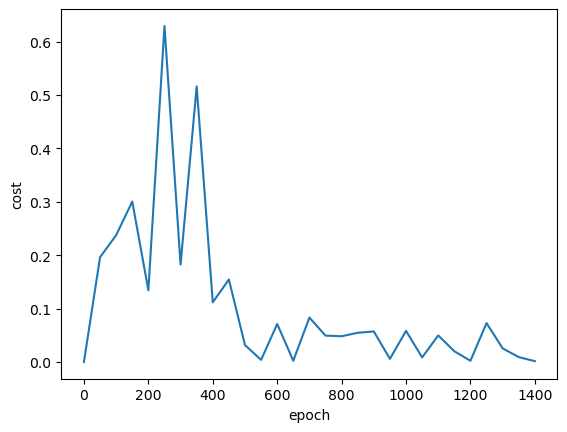

C:\Users\Jay\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(146.6662332396928)

In [114]:
w_sgd,b_sgd,cost,costlist,epochlist=stochasticgradientdescent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1440)
w_sgd,b_sgd,cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epochlist,costlist)
plt.show()
predict(2600,4,w_sgd,b_sgd)

In [125]:
import random
        
def stochasticgradientdescent(x,y,epochs,batch_size=5,learningrate=0.01):
    nof=x.shape[1]
    w=np.ones(shape=(nof))
    b=0
    totalsamples=x.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        sample_x,sample_y=np.ones(shape=(batch_size,nof)),np.ones(shape=(batch_size,))
        sind=0
        for _ in range(batch_size):
            index=random.randint(0,totalsamples-1)
            sample_x[sind]=x[index]
            sampley[sind]=y[index]
            sind+=1
        ypred=np.dot(w,sample_x.T)+b
        w_grad = -(2/totalsamples)*(sample_x.T.dot(sampley-ypred))
        b_grad = -(2/totalsamples)*np.sum(sampley-ypred)
        
        w = w - learningrate * w_grad
        b = b - learningrate * b_grad
        
        cost = np.mean(np.square(sampley-ypred)) # MSE (Mean Squared Error)
        
        if i%50==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [126]:
w_sgd,b_sgd,cost,costlist,epochlist=stochasticgradientdescent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_sgd,b_sgd,cost

NameError: name 'sampley' is not defined